In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('banknote.csv')
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
0    1372 non-null float64
1    1372 non-null float64
2    1372 non-null float64
3    1372 non-null float64
4    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
data.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
data.dtypes

0    float64
1    float64
2    float64
3    float64
4      int64
dtype: object

In [6]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

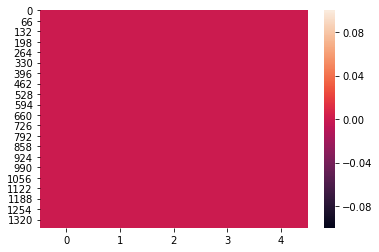

In [7]:
sns.heatmap(data.isnull())

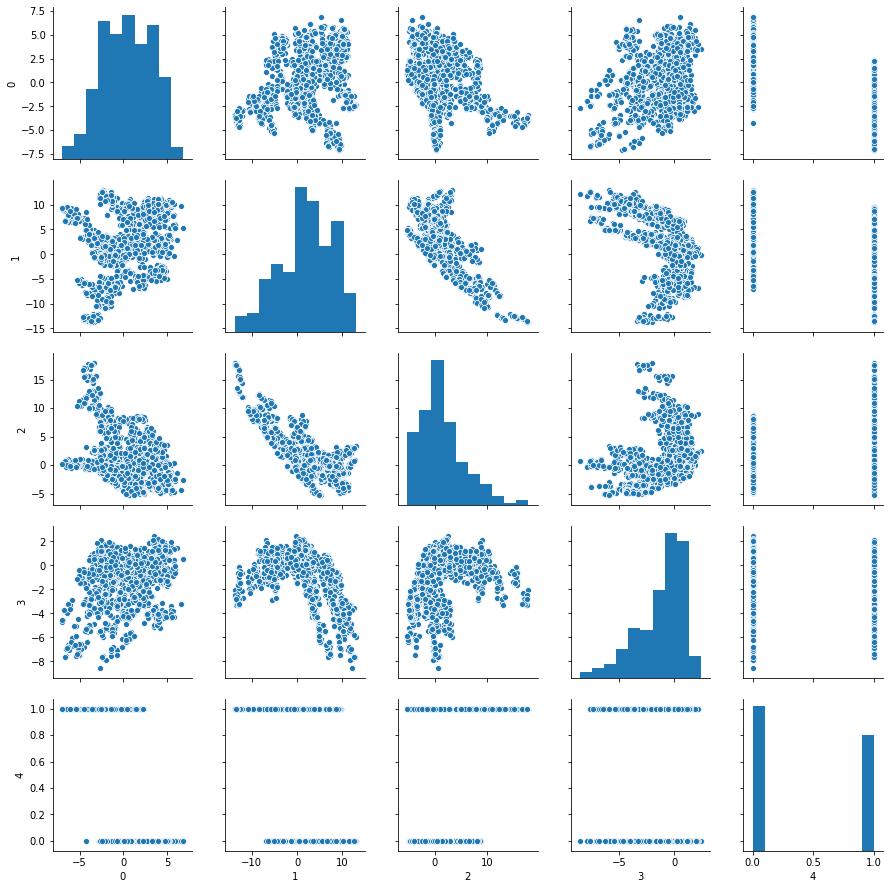

In [8]:
sns.pairplot(data)

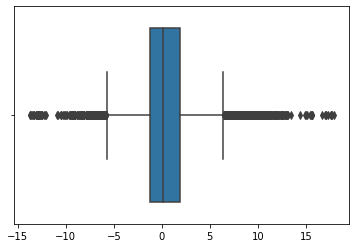

In [9]:
sns.boxplot(data)

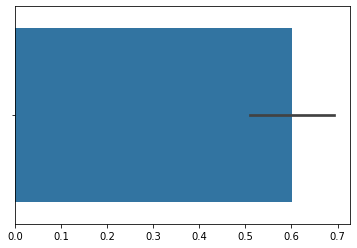

In [10]:
sns.barplot(data)

In [11]:
from scipy.stats import zscore
import numpy as np

In [12]:
z=np.abs(zscore(data))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [14]:
threshold=1.5
print(np.where(z>3.5))

(array([ 465,  820,  881,  942, 1003, 1064, 1125, 1186, 1247, 1308, 1369],
      dtype=int64), array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [15]:
df=data[(z<3).all(axis=1)]
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
print(data.shape)
print(df.shape)

(1372, 5)
(1336, 5)


In [17]:
#Using MinMaxScaler to shrinks the range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_new=scaler.fit_transform(df.astype(float))
df_new

array([[0.76900389, 0.8366713 , 0.13214065, 0.70588635, 0.        ],
       [0.83565902, 0.81766488, 0.15072926, 0.60281067, 0.        ],
       [0.78662859, 0.40583875, 0.38436894, 0.76208343, 0.        ],
       ...,
       [0.40769026, 0.32050613, 0.62709235, 0.78598018, 1.        ],
       [0.25084193, 0.18690855, 0.94244301, 0.62106781, 1.        ],
       [0.32452819, 0.48131029, 0.42488325, 0.87263662, 1.        ]])

In [18]:
df_new=pd.DataFrame(df_new)
df_new.head()

,0,1,2,3,4
0,0.769004,0.836671,0.132141,0.705886,0.0
1,0.835659,0.817665,0.150729,0.602811,0.0
2,0.786629,0.405839,0.384369,0.762083,0.0
3,0.757105,0.869322,0.067963,0.386294,0.0
4,0.531578,0.336593,0.525508,0.650870,0.0


In [19]:
df_new.corr()

,0,1,2,3,4
0,1.000000,0.247217,-0.349051,0.244024,-0.728770
1,0.247217,1.000000,-0.766855,-0.554480,-0.427038
2,-0.349051,-0.766855,1.000000,0.381428,0.107973
3,0.244024,-0.554480,0.381428,1.000000,-0.029840
4,-0.728770,-0.427038,0.107973,-0.029840,1.000000


In [21]:
#Model Building- as attrition is on column 1, so making it as Target.
x=df_new.drop(4,axis=1)
x.head()

,0,1,2,3
0,0.769004,0.836671,0.132141,0.705886
1,0.835659,0.817665,0.150729,0.602811
2,0.786629,0.405839,0.384369,0.762083
3,0.757105,0.869322,0.067963,0.386294
4,0.531578,0.336593,0.525508,0.650870


In [22]:
y=df_new[4]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 4, dtype: float64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=5)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1055, 4)
(281, 4)
(1055,)
(281,)


In [26]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9786476868327402
[[142   2]
 [  4 133]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       144
         1.0       0.99      0.97      0.98       137

    accuracy                           0.98       281
   macro avg       0.98      0.98      0.98       281
weighted avg       0.98      0.98      0.98       281



In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.5409252669039146
[[144   0]
 [129   8]]
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       144
         1.0       1.00      0.06      0.11       137

    accuracy                           0.54       281
   macro avg       0.76      0.53      0.40       281
weighted avg       0.76      0.54      0.41       281



In [30]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9928825622775801
[[142   2]
 [  0 137]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       144
         1.0       0.99      1.00      0.99       137

    accuracy                           0.99       281
   macro avg       0.99      0.99      0.99       281
weighted avg       0.99      0.99      0.99       281



In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9857651245551602
[[140   4]
 [  0 137]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       144
         1.0       0.97      1.00      0.99       137

    accuracy                           0.99       281
   macro avg       0.99      0.99      0.99       281
weighted avg       0.99      0.99      0.99       281



In [32]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.99644128113879
[[143   1]
 [  0 137]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       144
         1.0       0.99      1.00      1.00       137

    accuracy                           1.00       281
   macro avg       1.00      1.00      1.00       281
weighted avg       1.00      1.00      1.00       281



In [33]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [34]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1.

In [35]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [36]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00694444 1.        ]
[0. 1. 1.]
[2. 1. 0.]


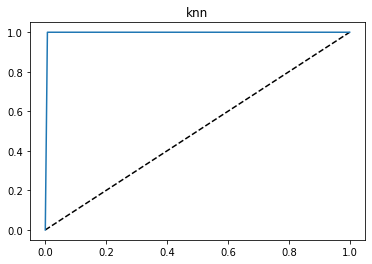

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="knn")
plt.title("knn")
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,knn.predict(x_test))
print(auc_score)

0.9965277777777778


In [39]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(lg,"Banknote_Authentication.pkl")

['Banknote_Authentication.pkl']